**ML Model**

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px 
import warnings 
warnings.filterwarnings('ignore')

In [16]:
df = pd.read_csv('ford.csv')
df.head()


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [ ]:
# df.info()
# df.describe()
# df.columns
# df.dtypes
# df.value_counts()

In [ ]:
# df.shape[0]
# df.shape[1]

In [ ]:
# sns.histplot(x=df['year'], y=df['price'], palette='Set2')

# sns.histplot(x=df['model'], y=df['price'])
# plt.xticks(rotation=90)
# plt.show()

In [ ]:
# sns.histplot(df['price'], bins=30, kde=True)

In [ ]:
# sns.boxplot(x=df['model'], y=df['price'])
# plt.xticks(rotation=90)
# plt.show()

In [7]:
# df.isnull().sum()
#df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

<Axes: >

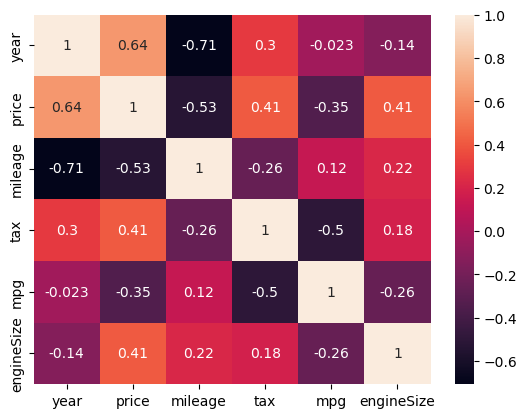

In [8]:
sns.heatmap(df.corr(numeric_only=True,), annot=True)

<Axes: xlabel='fuelType', ylabel='price'>

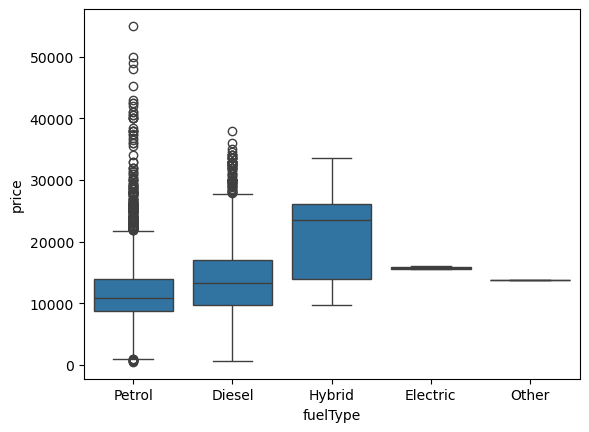

In [19]:
# sns.scatterplot(x=df['mileage'], y=df['price'], palette='Set2')
# sns.boxplot(x=df['transmission'], y=df['price'])
sns.boxplot(x=df['fuelType'], y=df['price'])

# Model Building

In [8]:
X = df.drop(columns='price', axis=1)
y = df['price']

In [10]:
# X
# y

0        12000
1        14000
2        13000
3        17500
4        16500
         ...  
17961     8999
17962     7499
17963     9999
17964     8299
17965     8299
Name: price, Length: 17812, dtype: int64

**One Hot Encoding**

In [50]:

X_One_hot_encoded = pd.get_dummies(X, columns=['model','transmission','fuelType'])

X_One_hot_encoded = X_One_hot_encoded.astype(int)

X_One_hot_encoded


,year,mileage,tax,mpg,engineSize,model_ B-MAX,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,...,model_ Transit Tourneo,model_Focus,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,15944,150,57,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,2018,9083,150,57,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,2017,12456,150,57,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,2019,10460,145,40,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,2019,1482,145,48,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,2017,16700,150,47,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
17962,2014,40700,30,57,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
17963,2015,7010,20,67,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
17964,2018,5007,145,57,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [14]:
X_One_hot_encoded.shape[1]

37

**Label Encoding**

In [41]:
from sklearn.preprocessing import LabelEncoder

columns = ['model', 'transmission', 'fuelType']

X_label_Encoded = X.copy()
label_encoders = {}

for col in columns: 
    le = LabelEncoder()
    X_label_Encoded[col] = le.fit_transform(X_label_Encoded[col].astype(str))
    label_encoders[col] = le 
 

In [87]:
# X_label_Encoded
label_encoders

{'model': LabelEncoder(),
 'transmission': LabelEncoder(),
 'fuelType': LabelEncoder()}

In [32]:
from sklearn.preprocessing import StandardScaler

In [44]:
X_label_Encoded[['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
       'engineSize']] = scaler.fit_transform(X_label_Encoded)

In [89]:
X_label_Encoded

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,-0.460281,0.067059,-2.667947,-0.382994,0.688206,0.591380,-0.020597,-0.810561
1,-0.210828,0.554393,0.042455,-0.736317,0.688206,0.591380,-0.020597,-0.810561
2,-0.210828,0.067059,0.042455,-0.562616,0.688206,0.591380,-0.020597,-0.810561
3,-0.460281,1.041726,0.042455,-0.665405,0.688206,0.510777,-1.737858,0.345325
4,-0.460281,1.041726,-2.667947,-1.127749,0.688206,0.510777,-0.908836,-0.810561
...,...,...,...,...,...,...,...,...
17961,-1.707547,0.067059,0.042455,-0.344061,0.688206,0.591380,-1.066745,0.114148
17962,-1.707547,-1.394942,0.042455,0.891875,0.688206,-1.343079,-0.020597,-0.810561
17963,-0.210828,-0.907608,0.042455,-0.843071,-1.455326,-1.504284,0.926858,0.576502
17964,1.036438,0.554393,0.042455,-0.946220,0.688206,0.510777,-0.020597,-0.348206


In [51]:

X_One_hot_encoded[['year', 'mileage', 'tax', 'mpg', 'engineSize']] = scaler.fit_transform(X_One_hot_encoded[['year', 'mileage', 'tax', 'mpg', 'engineSize']])


In [52]:
X_One_hot_encoded

,year,mileage,tax,mpg,engineSize,model_ B-MAX,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,...,model_ Transit Tourneo,model_Focus,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,0.067059,-0.382994,0.591380,-0.042291,-0.446958,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0.554393,-0.736317,0.591380,-0.042291,-0.446958,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0.067059,-0.562616,0.591380,-0.042291,-0.446958,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,1.041726,-0.665405,0.510777,-1.720193,-0.446958,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,1.041726,-1.127749,0.510777,-0.930592,-0.446958,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,0.067059,-0.344061,0.591380,-1.029292,-0.446958,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
17962,-1.394942,0.891875,-1.343079,-0.042291,-0.446958,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
17963,-0.907608,-0.843071,-1.504284,0.944711,-0.446958,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
17964,0.554393,-0.946220,0.510777,-0.042291,-0.446958,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [53]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

**Model building for X_label_Encoded**

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X_label_Encoded,y,test_size=0.33,random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [71]:
y_predict = model.predict(X_test)
y_predict

array([16540.94185432, 15076.66531175, 16754.43591901, ...,
       13428.26494596, 13136.81760351, 13571.38462746], shape=(5878,))

In [ ]:
y_test

In [72]:
r2 = r2_score(y_test, y_predict)
r2 

0.7167444123752094

In [73]:
n = X_label_Encoded.shape[0]
p = X_label_Encoded.shape[1]
adjusted_r2 = 1 - ( (1-r2)*(n-1)) / (n-p-1) 
adjusted_r2

0.7166171279455628

In [ ]:
# Performance accuracy of X_label_encoded model is 71 %

**Model building for X_One_hot_encoded**

In [81]:
X_train,X_test,y_train,y_test = train_test_split(X_One_hot_encoded,y,test_size=0.30, random_state=42)
model2 = LinearRegression()
model2.fit(X_train, y_train)

LinearRegression()

In [82]:
y_predict = model2.predict(X_test)
y_predict

array([22182.11641478, 15039.3085347 , 16526.41562464, ...,
       17893.47345319, 14092.35363348,  8923.36344038], shape=(5344,))

In [83]:
y_test

9891     22975
13006    18000
15284    18500
6399      9985
8182      7998
         ...  
13163    20000
10082     4795
10435    19236
10577    13979
17709     8800
Name: price, Length: 5344, dtype: int64

In [84]:
r2 = r2_score(y_test, y_predict)
r2 

0.8283871336332211

In [85]:
n = X_One_hot_encoded.shape[0]
p = X_One_hot_encoded.shape[1]
adjusted_r2 = 1 - ((1-r2) * (n-1)) / (n-p-1)

In [86]:
adjusted_r2

0.8280298884404919

In [ ]:
# Performance accuracy of X_one_hot_encoded model is 82 %  